In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Description of the attributes
* __age__: Age of the patient
* __anaemia__: Haemoglobin level of patient (Boolean)
* __creatinine_phosphokinase__: Level of the CPK enzyme in the blood (mcg/L)
* __diabetes__: If the patient has diabetes (Boolean)
* __ejection_fraction__: Percentage of blood leaving the heart at each contraction
* __high_blood_pressure__: If the patient has hypertension (Boolean)
* __platelets__: Platelet count of blood (kiloplatelets/mL)
* __serum_creatinine__: Level of serum creatinine in the blood (mg/dL)
* __serum_sodium__: Level of serum sodium in the blood (mEq/L)
* __sex__: Sex of the patient
* __smoking__: If the patient smokes or not (Boolean)
* __time__: Follow-up period (days)
* __DEATH_EVENT__: If the patient deceased during the follow-up period (Boolean)

 __Attributes having Boolean values__: 0 = Negative (No); 1 = Positive (Yes)

## Data Analysis

In [3]:
# Basic statistical summary
stat_info= df.info()

# Check for missing values
df_describe = df.describe()

df.info
df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There are no null values and all features are in _int64_ or _float64_ which is suitable for use in an algorithm.

Large differences in _Median_ and _Mean_ for _'creatine_phosphokinase'_ and _'serum_creatinine'_ indicate significant skew in their respective data.

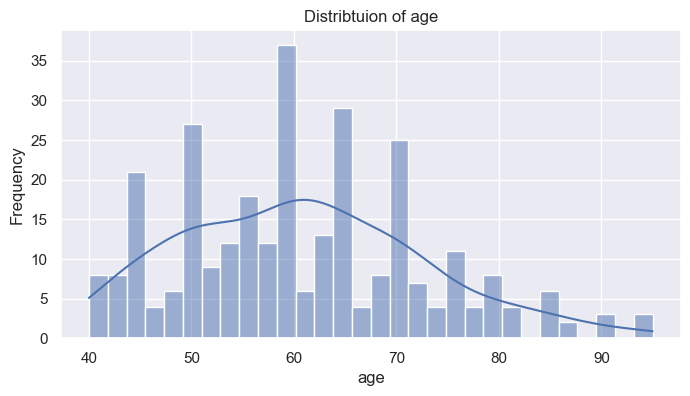

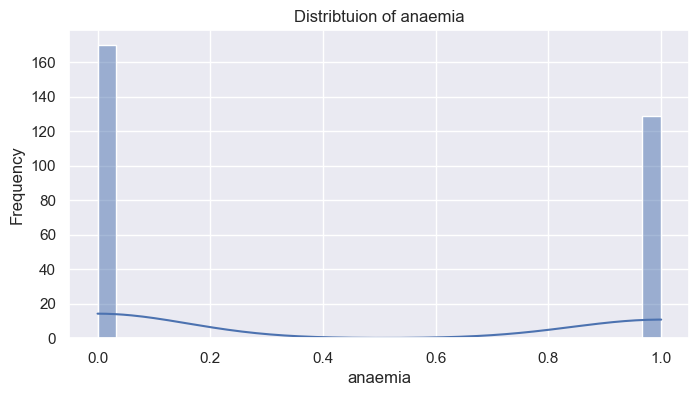

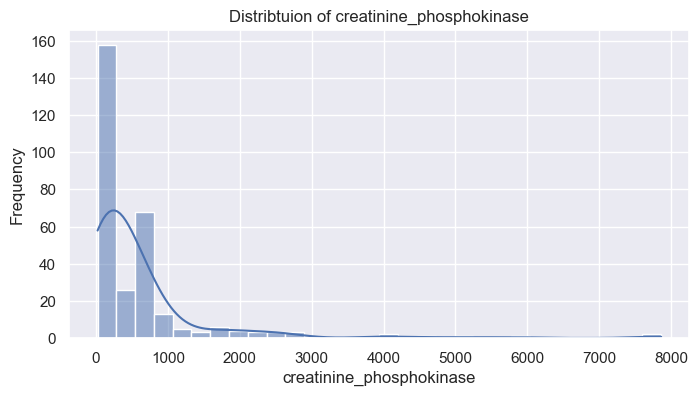

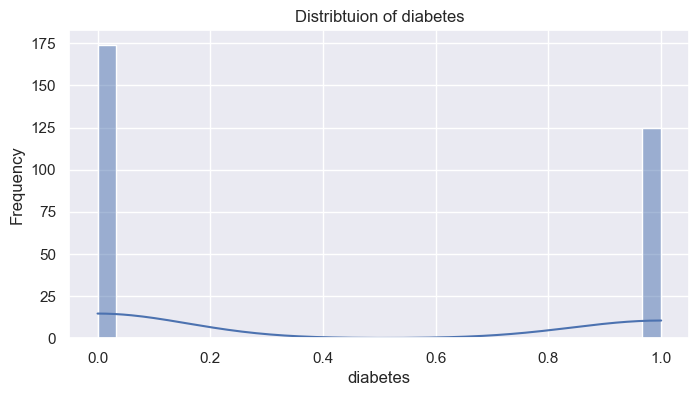

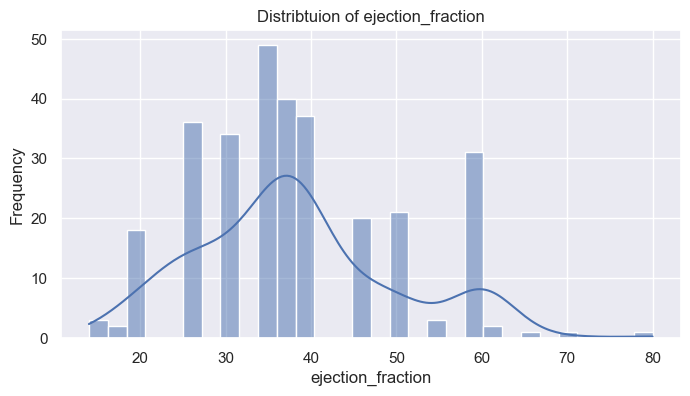

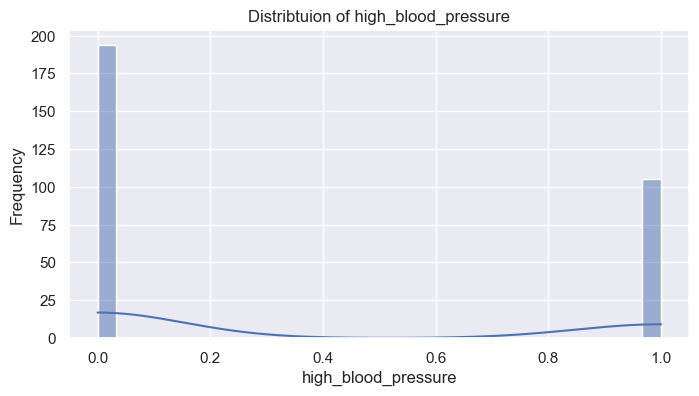

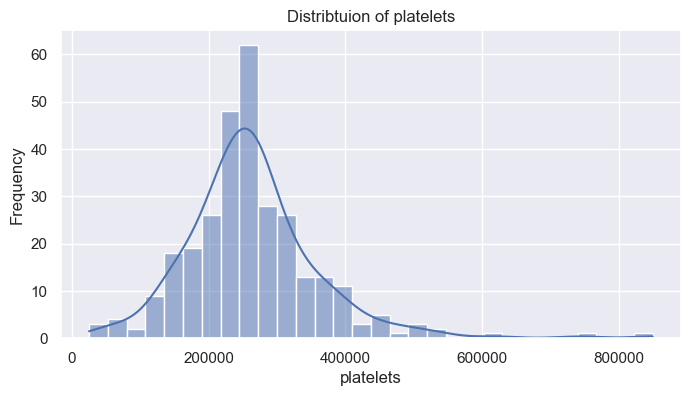

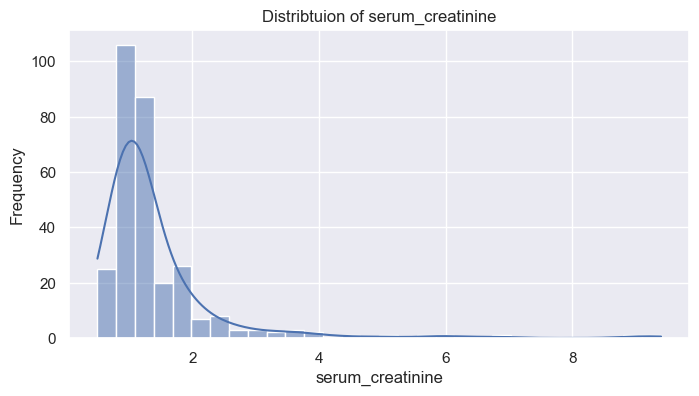

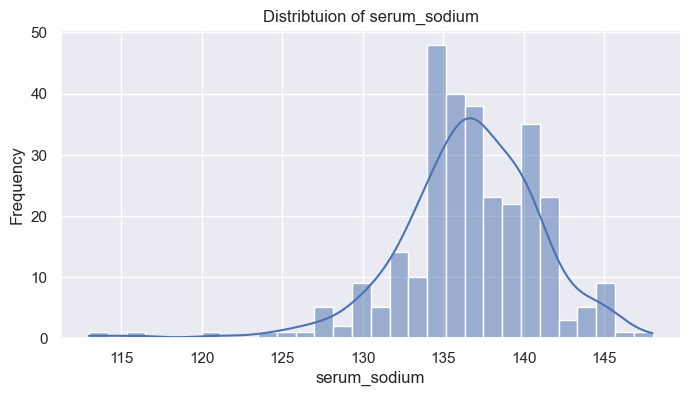

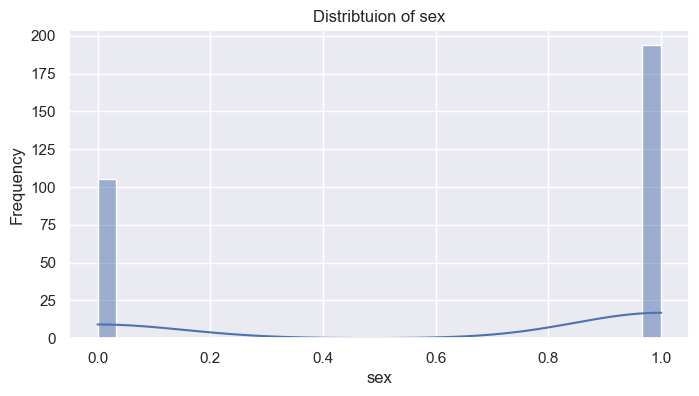

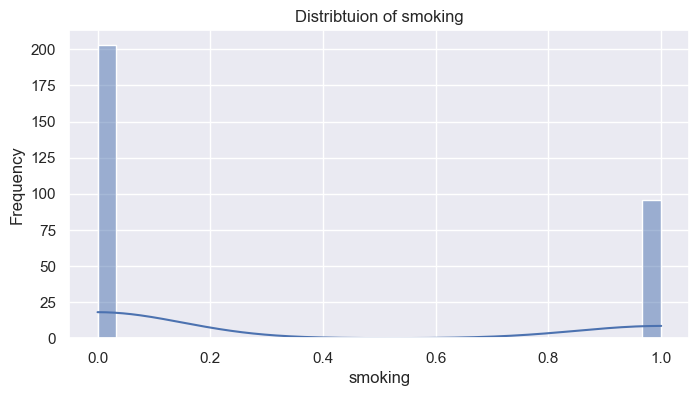

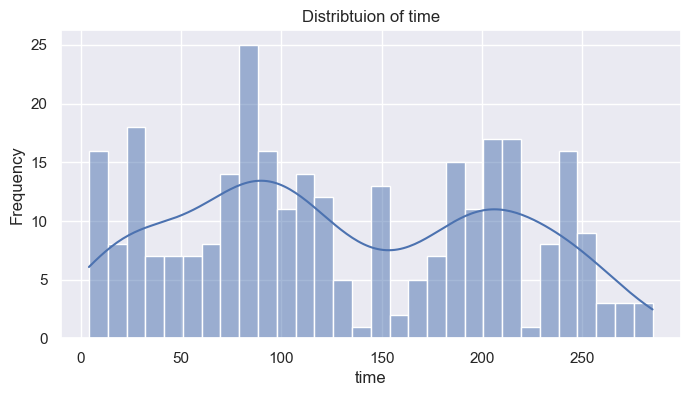

In [4]:
# Set the aesthetics for the plots
sns.set(style='darkgrid')

# Iterate the plot

for column in df.columns[:-1]: # Excluding 'DEATH_EVENT'
    plt.figure(figsize=(8,4))
    sns.histplot(df[column], kde = True, bins =30)
    plt.title(f'Distribtuion of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show

#### Observations
* __Age__: The mean and median are quite close (mean: 60.83, median: 60.0), suggesting a relatively symmetrical distribution.

* __Creatinine Phosphokinase (CPK)__: There's a large difference between the mean (581.84) and the median (250.0), with the mean being significantly higher, indicating a right-skewed distribution. This is further supported by a very high maximum value (7861) compared to the 75th percentile (582.0), suggesting the presence of outliers.

* __Ejection Fraction__: Similar to age, the mean and median are close (mean: 38.08, median: 38.0), indicating a relatively symmetrical distribution.

* __Platelets__: The mean (263358.03) and median (262000.0) are close, suggesting a symmetrical distribution, but the range from the minimum to the maximum (25100.0 to 850000.0) indicates potential for outliers, possibly leading to slight skewness.

* __Serum Creatinine__: With the mean (1.39) being higher than the median (1.1) and a large range (min: 0.5, max: 9.4), this indicates a right-skewed distribution, likely due to outliers affecting the mean.

* __Serum Sodium__: The mean and median are relatively close (mean: 136.63, median: 137.0), indicating a symmetrical distribution, but given the narrower range (min: 113, max: 148), it's less likely to be significantly skewed.






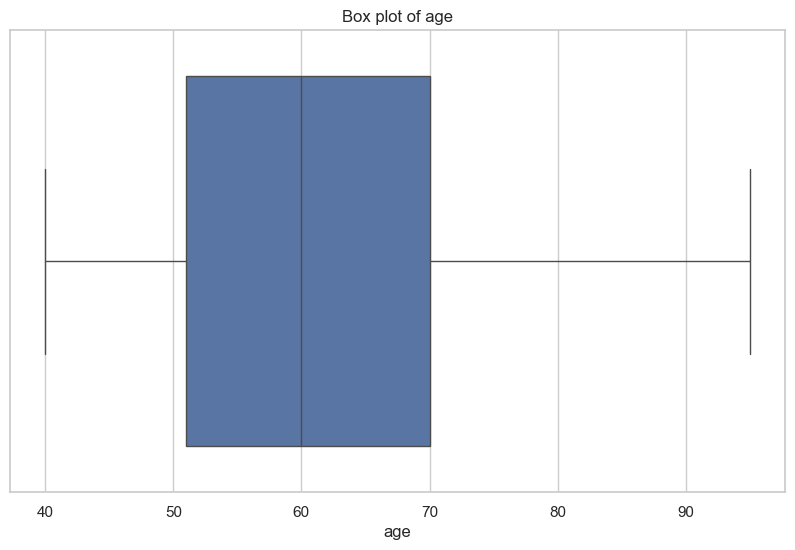

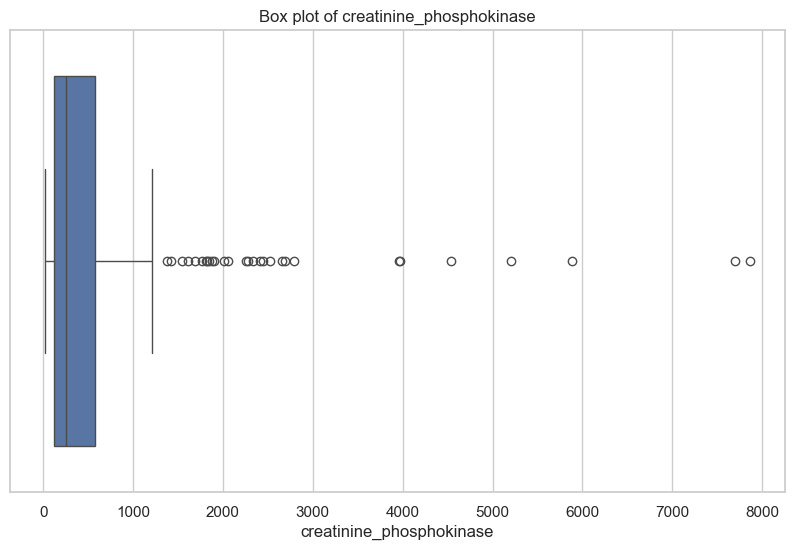

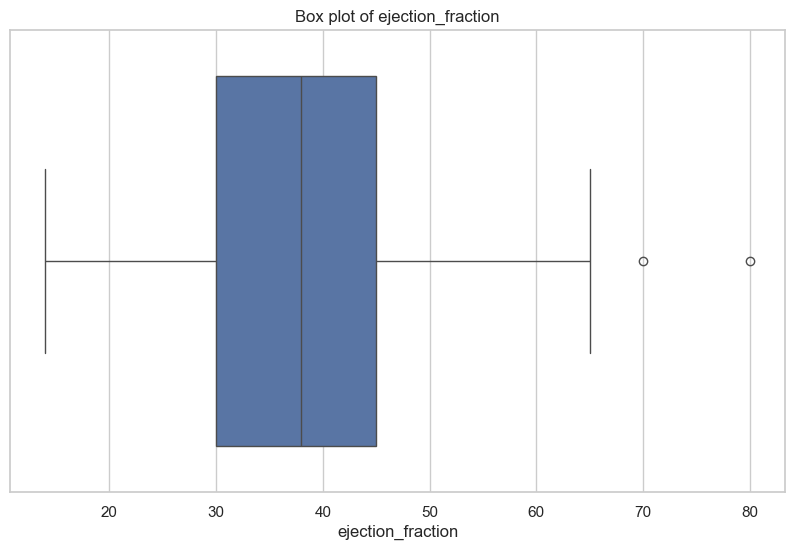

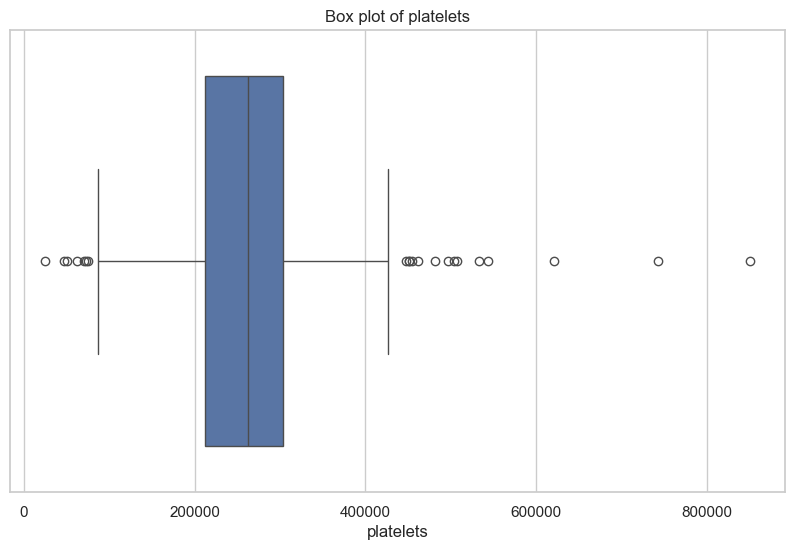

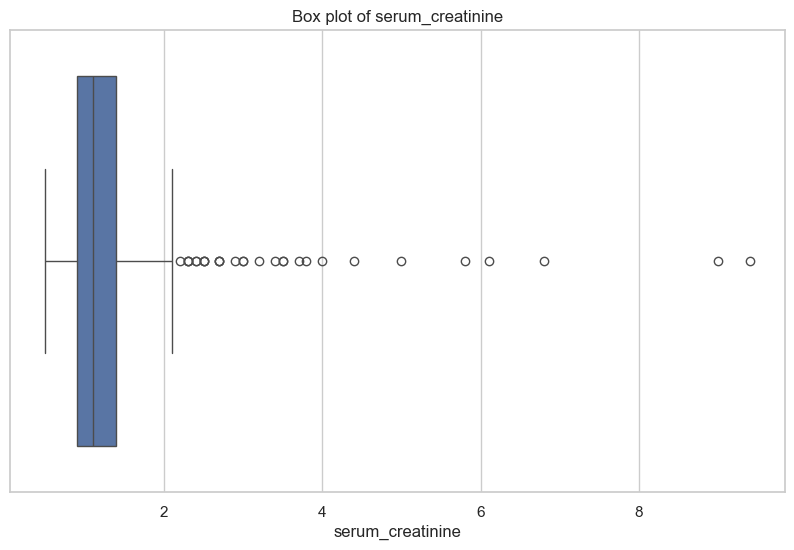

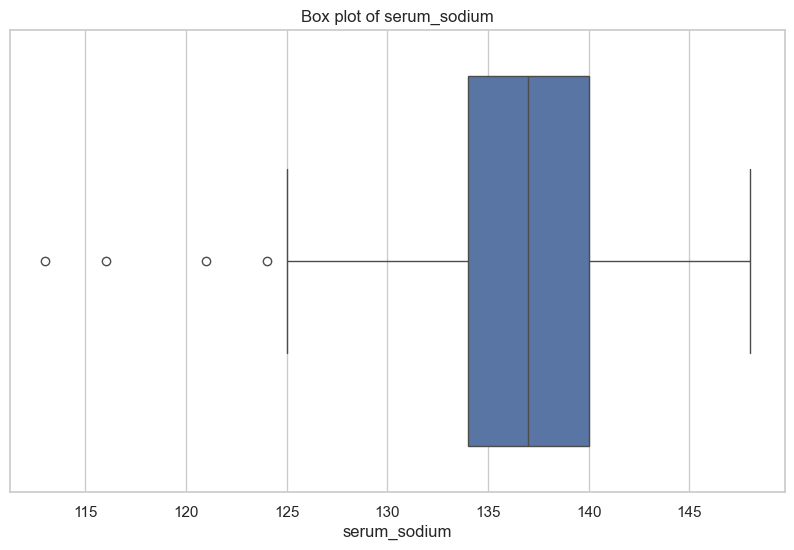

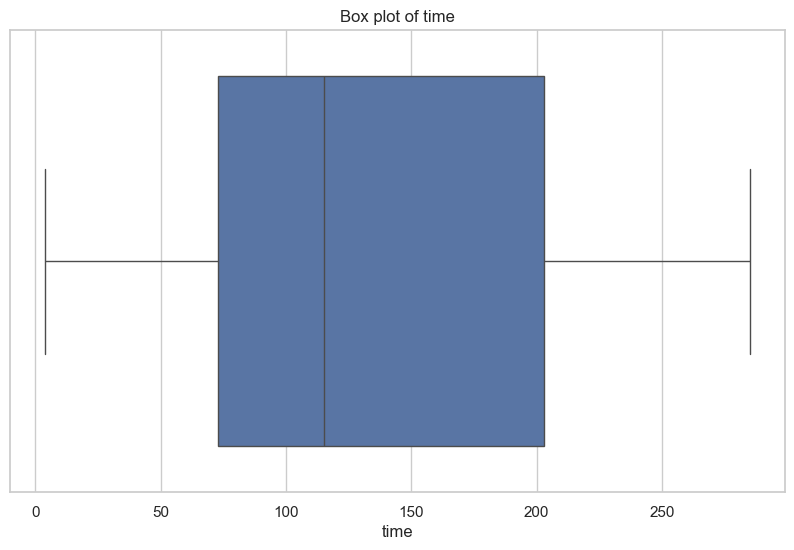

In [5]:
# create list of non binary values for boxplot
non_binary = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

sns.set(style="whitegrid")
for i in non_binary:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[i])
    plt.title(f"Box plot of {i}")
    plt.show()

#### Observations

The suspected variables with outliers (__Creatinine Phosphokinase (CPK)__, __Platelets__, __Serum Creatinine__) do show some amount of outliers.

This is most likely down to natural variation in the sample where a broad range is expected. In conclusion the skewed variables and outliers within them are inherent properties of biological data. 


To asses correlation

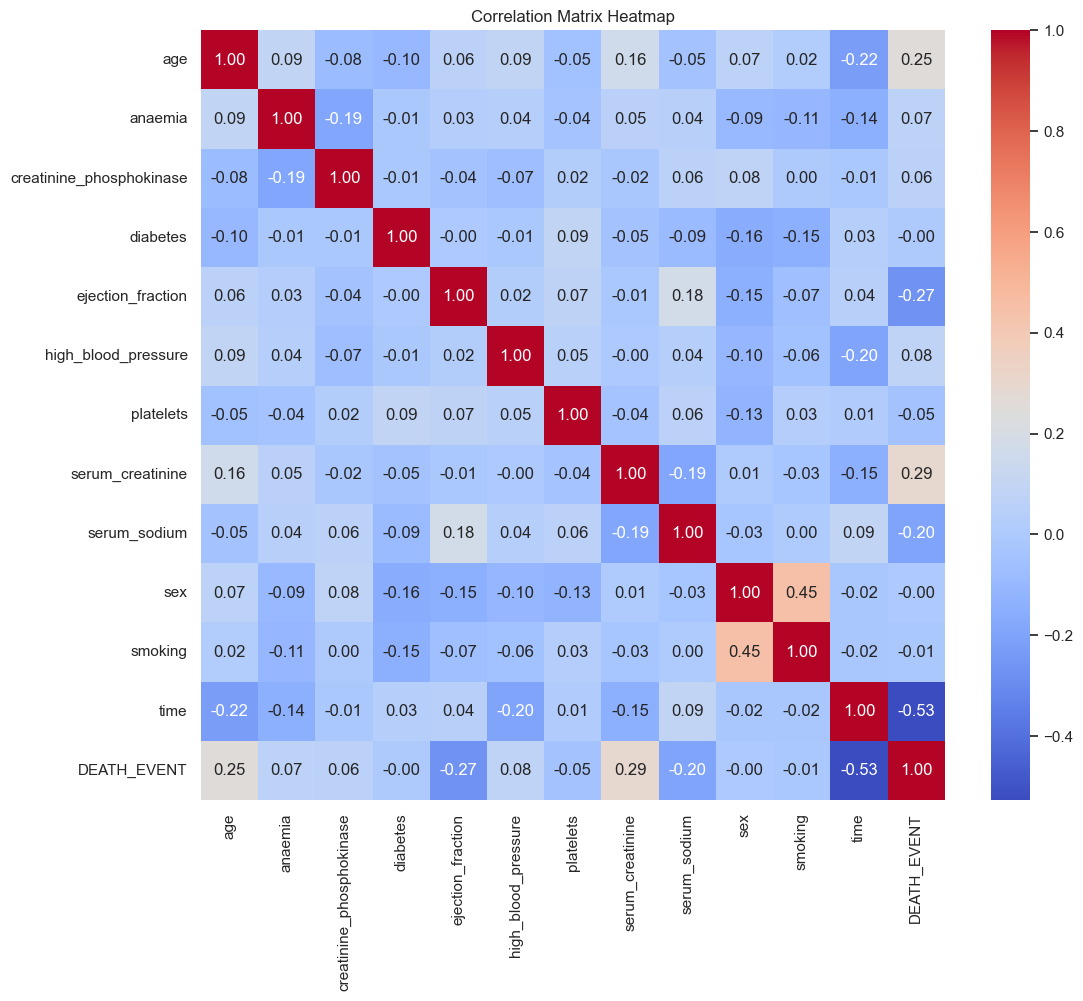

In [6]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Observations

* __Age__: Shows a positive correlation with DEATH_EVENT (0.25), indicating that older patients have a higher risk of death.
* __Ejection Fraction__: Negatively correlated with DEATH_EVENT (-0.27), suggesting that higher ejection fraction values (which imply better heart function) are associated with lower mortality.
* __Serum Creatinine__: Has a positive correlation with DEATH_EVENT (0.29), implying that higher levels of serum creatinine are associated with an increased risk of death.
* __Serum Sodium__: Shows a negative correlation with DEATH_EVENT (-0.20), indicating that lower levels of serum sodium are linked to higher mortality.
* __Time__: The most negatively correlated variable with DEATH_EVENT (-0.53), indicating that longer follow-up times are associated with lower mortality. This variable, however, might be tricky to use in predictive modeling as it could introduce data leakage if the goal is to predict outcomes at the outset of the observation period.

While some variables are less correlated than others, in the context of this data set and the objectice of predicting mortality, it would be naive to drop any colums that are not linearly correlated with the target variable.

For this reason no data columns will be dropped for the initial modelling.

# Data preprocessing

In [7]:
# Define independent and dependent variables
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [9]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [10]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

#### Notes.

Here we split the data first and then applied scaling to prevent Data Leakage

In [11]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [12]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=900)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=123)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print(f"Log Reg\n {classification_report(y_test, y_pred_log_reg)}")
print(f"RF\n {classification_report(y_test, y_pred_rf)}")
print(f"SVM\n {classification_report(y_test, y_pred_svc)}")

Log Reg
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.77      0.77      0.77        30

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90

RF
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.76      0.73      0.75        30

    accuracy                           0.83        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.83      0.83      0.83        90

SVM
               precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



#### Observations



In [13]:
from joblib import dump, load

# Save the models to disk
dump(log_reg, 'Titanic_LogReg_mdl.joblib')
dump(random_forest, 'Titanic_RF_mdl.joblib')
dump(svc, 'Titanic_SVC_mdl.joblib')

# Load the models from disk
log_reg_loaded = load('Titanic_LogReg_mdl.joblib')
random_forest_loaded = load('Titanic_RF_mdl.joblib')
svc_loaded = load('Titanic_SVC_mdl.joblib')


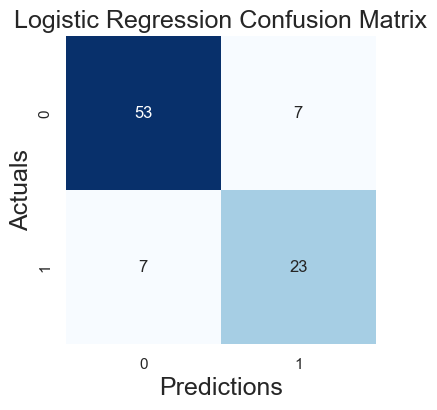

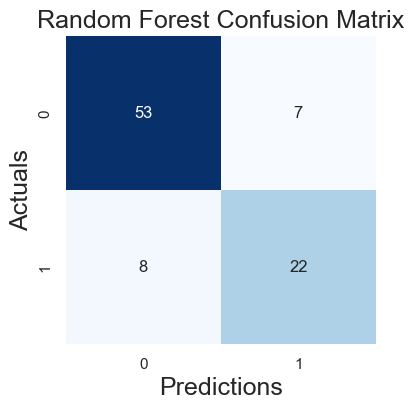

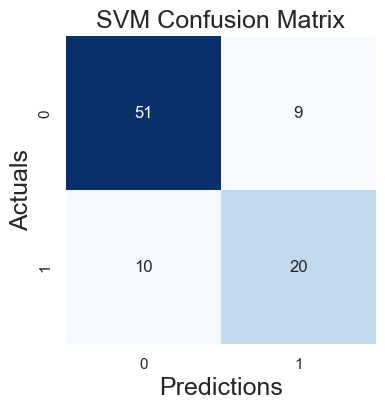

In [14]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plotting function using seaborn heatmap for better visual
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()

# Plotting confusion matrix for each model
plot_confusion_matrix(cm_log_reg, title='Logistic Regression Confusion Matrix')
plot_confusion_matrix(cm_rf, title='Random Forest Confusion Matrix')
plot_confusion_matrix(cm_svc, title='SVM Confusion Matrix')


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.initializers import he_normal
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(units=12, kernel_initializer='uniform', activation='relu', input_dim=12))
# regularization
model.add(Dropout(0.25))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# adjust the learning rate by creating an optimizer instance and setting the learning rate manually
optimizer = Adam(learning_rate=0.001) # example learning rate, needs tuning
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
## train your network

history = model.fit(X_train, y_train, batch_size=30, epochs=80, validation_split=0.25)

Epoch 1/80




6/6 [==============================] - 1s 40ms/step - loss: 0.6931 - accuracy: 0.5128 - val_loss: 0.6906 - val_accuracy: 0.7736
Epoch 2/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.6282 - val_loss: 0.6880 - val_accuracy: 0.8302
Epoch 3/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6894 - accuracy: 0.6346 - val_loss: 0.6853 - val_accuracy: 0.8302
Epoch 4/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.6346 - val_loss: 0.6822 - val_accuracy: 0.8302
Epoch 5/80
6/6 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.6410 - val_loss: 0.6792 - val_accuracy: 0.8302
Epoch 6/80
6/6 [==============================] - 0s 10ms/step - loss: 0.6835 - accuracy: 0.6538 - val_loss: 0.6753 - val_accuracy: 0.8302
Epoch 7/80
6/6 [==============================] - 0s 8ms/step - loss: 0.6803 - accuracy: 0.6538 - val_loss: 0.6709 - val_accuracy: 0.8302
Epoch 8/80
6/6 [==========================

In [19]:
model.save('titanic_ann.h5')

In [20]:
titanic_ann = tf.keras.models.load_model('titanic_ann.h5')

In [21]:
y_pred_ann = titanic_ann.predict(X_test)
y_pred_ann = (y_pred_ann)
print(y_test)
print(y_pred_ann)

3/3 [==============================] - 0s 3ms/step
81     0
176    0
121    0
87     0
239    0
      ..
134    0
0      1
293    0
153    0
11     1
Name: DEATH_EVENT, Length: 90, dtype: int64
[[0.3822574 ]
 [0.35880318]
 [0.58251774]
 [0.18787816]
 [0.03797975]
 [0.22087784]
 [0.84771156]
 [0.7559732 ]
 [0.56772333]
 [0.07686408]
 [0.5544807 ]
 [0.1564191 ]
 [0.30607945]
 [0.7423776 ]
 [0.30497676]
 [0.03043383]
 [0.03164615]
 [0.9633907 ]
 [0.28173974]
 [0.3007383 ]
 [0.1667577 ]
 [0.16019467]
 [0.908134  ]
 [0.5178699 ]
 [0.6462822 ]
 [0.16200094]
 [0.21867639]
 [0.28947383]
 [0.91673654]
 [0.02541815]
 [0.05804849]
 [0.15343136]
 [0.7955656 ]
 [0.75350314]
 [0.01924653]
 [0.06894868]
 [0.08454484]
 [0.19559634]
 [0.87515205]
 [0.87849003]
 [0.29571217]
 [0.95636964]
 [0.0397555 ]
 [0.24954958]
 [0.37611657]
 [0.6956033 ]
 [0.07192097]
 [0.32020515]
 [0.02233541]
 [0.58810693]
 [0.09032396]
 [0.05038276]
 [0.06199108]
 [0.77942723]
 [0.47527894]
 [0.02235067]
 [0.3333529 ]
 [0.6735

In [22]:
print(y_test.shape)
print(y_pred_ann.shape)

(90,)
(90, 1)


In [23]:
y_pred_ann = y_pred_ann.flatten()

In [24]:
pd.DataFrame({'Actual': y_test, 'Predited': y_pred_ann})

,Actual,Predited
81,0,0.382257
176,0,0.358803
121,0,0.582518
87,0,0.187878
239,0,0.037980
...,...,...
134,0,0.757315
0,1,0.882145
293,0,0.046766
153,0,0.309024


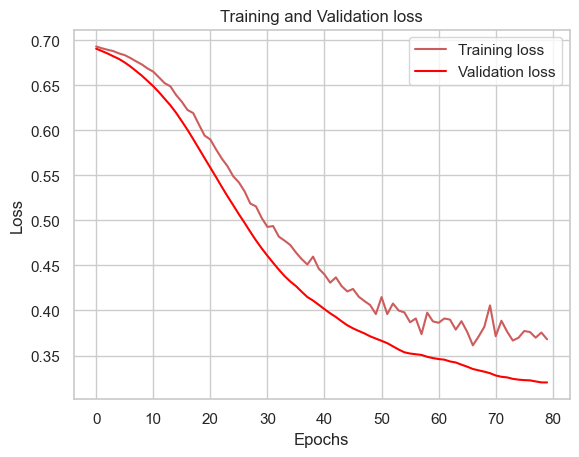

In [25]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

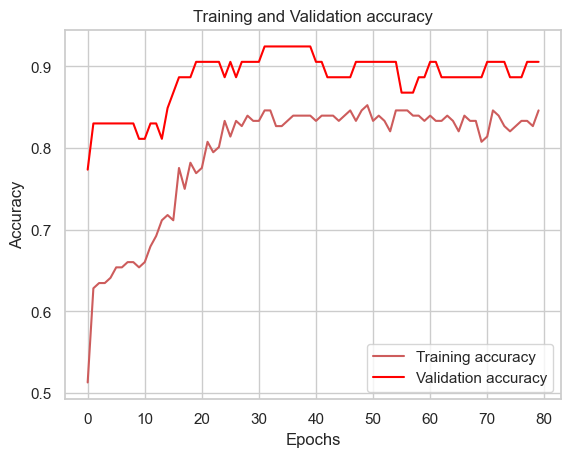

In [26]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

3/3 [==============================] - 0s 2ms/step


<Axes: >

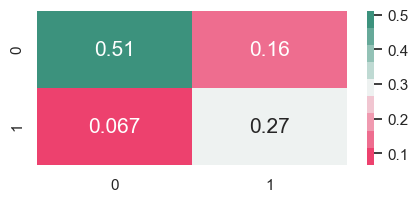

In [28]:
# Confusion matrix
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(5,2))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

AUC: 0.783333


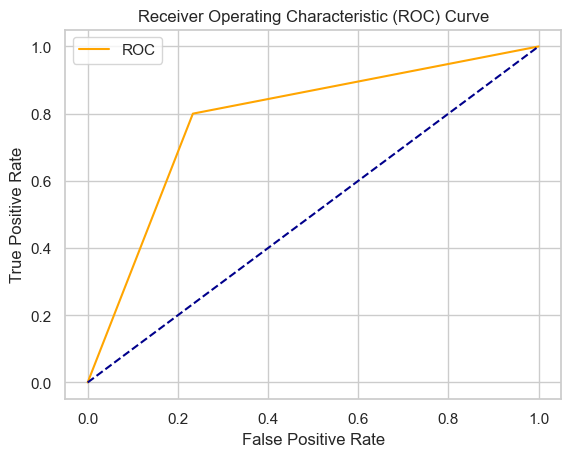

In [29]:

auc_mod2 = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred) # the underscore is a throwaway variable
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        60
           1       0.63      0.80      0.71        30

    accuracy                           0.78        90
   macro avg       0.76      0.78      0.76        90
weighted avg       0.80      0.78      0.78        90

